Importing the necessary libraries

In [13]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from matplotlib import style
import re

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
dt = pd.read_csv('SpamCollection',sep = '\t', header = None)

In [9]:
dt.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
Length = []
text = dt.Text
for r in text:
    Length.append(len(r))

In [35]:
Length = pd.DataFrame(Length)
dt = pd.concat([dt,Length], axis = 1)
dt.columns = ['Label','Text','TextLength']

In [36]:
dt.head(10)

,Label,Text,TextLength
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [37]:
dt.shape

(5572, 3)

Data Exploration

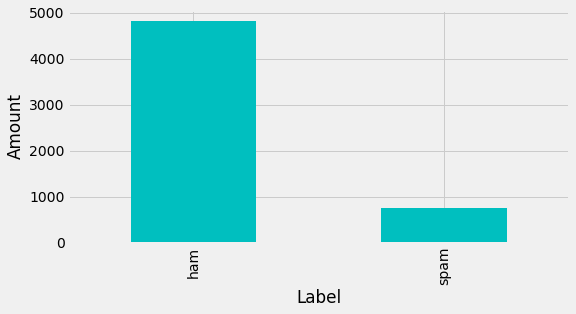

In [20]:
style.use('fivethirtyeight')
dt.Label.value_counts().plot.bar(figsize = (8,4), color = 'c')
plt.xlabel('Label')
plt.ylabel('Amount')
plt.show()

In [38]:
x = dt.Text
y = dt.Label

Text cleaning

In [40]:
def cleanText(text):
    
    #for removing numbers
    text=re.sub("\d+","",text)
    #for removing punctuations
    text=re.sub(r'[^\w\s]',"",text)
    #for removing stopwords
    text = [i.lower() for i in text.split() if i.lower() not in stopwords.words('english')]
    
    return (text)

Splitting into training and testing

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 25)

-Creating a pipeline with a TfidfVectorizer and a Support Vector Classifier

-I'm going to use the cleanText function as an analyzer to the Tfidf so that everytime when a text is entered it can be cleaned.

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

model = make_pipeline(TfidfVectorizer(analyzer = cleanText),SVC(kernel = 'linear'))
model.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer=<function cleanText at 0x000000D2F57924C0>)),
                ('svc', SVC(kernel='linear'))])

In [47]:
predicted = model.predict(x_test)
predicted

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

Checking how the model is doing

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1443
        spam       0.98      0.89      0.93       229

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [50]:
pd.crosstab(y_test,predicted)

col_0,ham,spam
Label,,
ham,1439,4
spam,25,204


From the above results, it is sfe to say that the model is doing very well.

Now I'm going to test it with a text from my phone...

In [61]:
def classify():
    text = str(input(''))
    pred = model.predict([text])
    print()
    print(pred)

In [62]:
classify()

Get a free R250 shopping voucher if you sign up to an MTN choice contract billed to your account.

['spam']


In [63]:
classify()

Hi Gary, remember loads of new fashion on sale at the IDENTITY SALE! Starts today in all stores.

['ham']
